In [129]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output

In [130]:
laliga = pd.read_csv("C:/Users/arvin/OneDrive/Desktop/INFO_Sports/Laliga 1992-2016/FMEL_Dataset.csv")
laliga.head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
0,1,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,21938400
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400
2,3,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,21938400
3,4,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800
4,5,1970-71,1,1,Elche,Granada,1,1,13/09/1970,22024800


In [131]:
laliga = laliga[laliga.division==1]
laliga.tail(8)

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
36677,36678,2017-18,1,38,Malaga,Getafe,0,1,19/05/2018,1526680800
36678,36679,2017-18,1,38,Las Palmas,Girona,1,2,19/05/2018,1526680800
36679,36680,2017-18,1,38,Leganes,Betis,3,2,19/05/2018,1526680800
36680,36681,2017-18,1,38,Villarreal,Real Madrid,2,2,19/05/2018,1526680800
36681,36682,2017-18,1,38,Atletico de Bilbao,Espanol,0,1,20/05/2018,1526767200
36682,36683,2017-18,1,38,Barcelona,Real Sociedad,1,0,20/05/2018,1526767200
36683,36684,2017-18,1,38,Valencia,Deportivo,2,1,20/05/2018,1526767200
36684,36685,2017-18,1,38,Atletico de Madrid,Eibar,2,2,20/05/2018,1526767200


In [132]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17169 entries, 0 to 36684
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            17169 non-null  int64 
 1   season        17169 non-null  object
 2   division      17169 non-null  int64 
 3   round         17169 non-null  int64 
 4   localTeam     17169 non-null  object
 5   visitorTeam   17169 non-null  object
 6   localGoals    17169 non-null  int64 
 7   visitorGoals  17169 non-null  int64 
 8   date          17169 non-null  object
 9   timestamp     17169 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 1.4+ MB


In [133]:
laliga.describe()

,id,division,round,localGoals,visitorGoals,timestamp
count,17169.000000,17169.0,17169.000000,17169.000000,17169.000000,1.716900e+04
mean,18365.798183,1.0,19.085794,1.594851,0.991496,8.123484e+08
std,10535.094660,0.0,10.822927,1.315497,1.056554,4.250611e+08
min,1.000000,1.0,1.000000,0.000000,0.000000,2.193840e+07
25%,9613.000000,1.0,10.000000,1.000000,0.000000,4.681116e+08
50%,18101.000000,1.0,19.000000,1.000000,1.000000,8.263260e+08
75%,27311.000000,1.0,28.000000,2.000000,2.000000,1.174172e+09
max,36685.000000,1.0,44.000000,10.000000,8.000000,1.526767e+09


In [134]:
laliga['local_team_won'] = laliga.apply(lambda x : 1 if x['localGoals']>x['visitorGoals'] else 0, axis = 1)
laliga['visitor_team_won'] = laliga.apply(lambda x : 1 if x['localGoals']<x['visitorGoals'] else 0, axis = 1)
laliga['draw'] = laliga.apply(lambda x : 1 if x['localGoals'] == x['visitorGoals'] else 0, axis = 1)
laliga.tail()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp,local_team_won,visitor_team_won,draw
36680,36681,2017-18,1,38,Villarreal,Real Madrid,2,2,19/05/2018,1526680800,0,0,1
36681,36682,2017-18,1,38,Atletico de Bilbao,Espanol,0,1,20/05/2018,1526767200,0,1,0
36682,36683,2017-18,1,38,Barcelona,Real Sociedad,1,0,20/05/2018,1526767200,1,0,0
36683,36684,2017-18,1,38,Valencia,Deportivo,2,1,20/05/2018,1526767200,1,0,0
36684,36685,2017-18,1,38,Atletico de Madrid,Eibar,2,2,20/05/2018,1526767200,0,0,1


In [135]:
df = laliga.copy()

In [141]:
a = df.groupby(['season','localTeam'])['local_team_won'].sum().reset_index().rename(columns = {'localTeam' : 'club', 'local_team_won': 'won'})
b = df.groupby(['season','visitorTeam'])['visitor_team_won'].sum().reset_index().rename(columns = {'visitorTeam':'club', 'visitor_team_won':'won'})
c = df.groupby(['season','localTeam'])['draw'].sum().reset_index().rename(columns = {'localTeam':'club','draw':'draw'})
d = df.groupby(['season','visitorTeam'])['draw'].sum().reset_index().rename(columns = {'visitorTeam':'club', 'draw':'draw'})
e = df.groupby(['season','localTeam'])['visitor_team_won'].sum().reset_index().rename(columns = {'localTeam':'club','visitor_team_won':'lost'})
f = df.groupby(['season','visitorTeam'])['local_team_won'].sum().reset_index().rename(columns = {'visitorTeam':'club','local_team_won':'lost'})

In [142]:
point_table = a.merge(b,on = ['season','club']).merge(c, on = ['season','club']).merge(d, on = ['season','club']).merge(e, on = ['season','club']).merge(f, on = ['season','club'])
#point_table = a.merge(b,on=['season','club']).merge(c,on=['season','club']).merge(d,on=['season','club']).merge(e,on=['season','club']).merge(f,on=['season','club'])
point_table.tail()

,season,club,won_x,won_y,draw_x,draw_y,lost_x,lost_y
923,2017-18,Real Madrid,12,10,4,6,3,3
924,2017-18,Real Sociedad,10,4,3,4,6,11
925,2017-18,Sevilla,11,6,5,2,3,11
926,2017-18,Valencia,13,9,3,4,3,6
927,2017-18,Villarreal,11,7,3,4,5,8


In [143]:
point_table = point_table.rename(columns = {'won_x': 'home_win', 'won_y':'away_win', 'lost_x' :'home_loss', 'lost_y':'away_loss'})
point_table['matches_won'] = point_table.home_win+ point_table.away_win
point_table['matches_drawn'] = point_table.draw_x + point_table.draw_y
point_table['matches_lost'] = point_table.home_loss + point_table.away_loss

point_table['total_matches'] = point_table.matches_won + point_table.matches_lost +point_table.matches_drawn
point_table = point_table.drop(['draw_x','draw_y'],axis = 1)

point_table.tail()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_drawn,matches_lost,total_matches
923,2017-18,Real Madrid,12,10,3,3,22,10,6,38
924,2017-18,Real Sociedad,10,4,6,11,14,7,17,38
925,2017-18,Sevilla,11,6,3,11,17,7,14,38
926,2017-18,Valencia,13,9,3,6,22,7,9,38
927,2017-18,Villarreal,11,7,5,8,18,7,13,38


In [144]:
point_table['points'] = point_table.matches_won*3 + point_table.matches_drawn
point_table.tail()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_drawn,matches_lost,total_matches,points
923,2017-18,Real Madrid,12,10,3,3,22,10,6,38,76
924,2017-18,Real Sociedad,10,4,6,11,14,7,17,38,49
925,2017-18,Sevilla,11,6,3,11,17,7,14,38,58
926,2017-18,Valencia,13,9,3,6,22,7,9,38,73
927,2017-18,Villarreal,11,7,5,8,18,7,13,38,61


In [145]:
g = df.groupby(['season','localTeam'])['localGoals'].sum().reset_index().rename(columns = {'localTeam':'club', 'localGoals':'home_goals'})
h = df.groupby(['season','visitorTeam'])['visitorGoals'].sum().reset_index().rename(columns = {'visitorTeam':'club', 'visitorGoals':'away_goals'})
i = df.groupby(['season','localTeam'])['visitorGoals'].sum().reset_index().rename(columns = {'localTeam':'club', 'visitorGoals':'goals_conceded'})
j = df.groupby(['season','visitorTeam'])['localGoals'].sum().reset_index().rename(columns = {'visitorTeam':'club', 'localGoals':'goals_conceded'})

point_table = point_table.merge(g , on = ['season','club']).merge(h , on = ['season','club']).merge(i , on = ['season','club']).merge(j , on = ['season','club'])

In [146]:
point_table.tail()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_drawn,matches_lost,total_matches,points,home_goals,away_goals,goals_conceded_x,goals_conceded_y
923,2017-18,Real Madrid,12,10,3,3,22,10,6,38,76,54,40,20,24
924,2017-18,Real Sociedad,10,4,6,11,14,7,17,38,49,47,19,29,30
925,2017-18,Sevilla,11,6,3,11,17,7,14,38,58,31,18,22,36
926,2017-18,Valencia,13,9,3,6,22,7,9,38,73,36,29,16,22
927,2017-18,Villarreal,11,7,5,8,18,7,13,38,61,35,22,22,28


In [147]:
point_table['goals_scored'] = point_table.home_goals + point_table.away_goals
point_table['goals_conceded'] = point_table.goals_conceded_x + point_table.goals_conceded_y
point_table['goal_difference'] = point_table.goals_scored - point_table.goals_conceded

point_table.tail()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_drawn,matches_lost,total_matches,points,home_goals,away_goals,goals_conceded_x,goals_conceded_y,goals_scored,goals_conceded,goal_difference
923,2017-18,Real Madrid,12,10,3,3,22,10,6,38,76,54,40,20,24,94,44,50
924,2017-18,Real Sociedad,10,4,6,11,14,7,17,38,49,47,19,29,30,66,59,7
925,2017-18,Sevilla,11,6,3,11,17,7,14,38,58,31,18,22,36,49,58,-9
926,2017-18,Valencia,13,9,3,6,22,7,9,38,73,36,29,16,22,65,38,27
927,2017-18,Villarreal,11,7,5,8,18,7,13,38,61,35,22,22,28,57,50,7


In [148]:
point_table = point_table.drop(['goals_conceded_x','goals_conceded_y'], axis = 1)
point_table.tail(6)

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_drawn,matches_lost,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
922,2017-18,Malaga,4,1,12,16,5,5,28,38,20,14,10,24,61,-37
923,2017-18,Real Madrid,12,10,3,3,22,10,6,38,76,54,40,94,44,50
924,2017-18,Real Sociedad,10,4,6,11,14,7,17,38,49,47,19,66,59,7
925,2017-18,Sevilla,11,6,3,11,17,7,14,38,58,31,18,49,58,-9
926,2017-18,Valencia,13,9,3,6,22,7,9,38,73,36,29,65,38,27
927,2017-18,Villarreal,11,7,5,8,18,7,13,38,61,35,22,57,50,7


In [149]:
point_table = point_table.sort_values(['season','points','goal_difference','goals_scored']).reset_index().drop('index', axis = 1)
point_table.tail()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_drawn,matches_lost,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
923,2017-18,Villarreal,11,7,5,8,18,7,13,38,61,35,22,57,50,7
924,2017-18,Valencia,13,9,3,6,22,7,9,38,73,36,29,65,38,27
925,2017-18,Real Madrid,12,10,3,3,22,10,6,38,76,54,40,94,44,50
926,2017-18,Atletico de Madrid,12,11,1,4,23,10,5,38,79,30,28,58,22,36
927,2017-18,Barcelona,16,12,0,1,28,9,1,38,93,53,46,99,29,70


In [150]:
point_table.tail(40).sort_values(by = ['season','points'],ascending=False)

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_drawn,matches_lost,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
927,2017-18,Barcelona,16,12,0,1,28,9,1,38,93,53,46,99,29,70
926,2017-18,Atletico de Madrid,12,11,1,4,23,10,5,38,79,30,28,58,22,36
925,2017-18,Real Madrid,12,10,3,3,22,10,6,38,76,54,40,94,44,50
924,2017-18,Valencia,13,9,3,6,22,7,9,38,73,36,29,65,38,27
923,2017-18,Villarreal,11,7,5,8,18,7,13,38,61,35,22,57,50,7
922,2017-18,Betis,10,8,5,9,18,6,14,38,60,35,25,60,61,-1
921,2017-18,Sevilla,11,6,3,11,17,7,14,38,58,31,18,49,58,-9
920,2017-18,Getafe,9,6,6,7,15,10,13,38,55,26,16,42,33,9
918,2017-18,Girona,8,6,8,7,14,9,15,38,51,26,24,50,59,-9
919,2017-18,Eibar,8,6,7,8,14,9,15,38,51,26,18,44,50,-6


In [151]:
df1 = point_table.copy()

In [152]:
champs = df1[df1.groupby(['season'])['points'].transform(max) == df1.points].reset_index()
champs.tail(40)

,index,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_drawn,matches_lost,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
9,177,1979-80,Real Madrid,15,7,0,3,22,9,3,34,75,49,21,70,33,37
10,195,1980-81,Real Madrid,15,5,1,8,20,5,9,34,65,46,20,66,37,29
11,213,1981-82,Real Sociedad,15,5,0,7,20,7,7,34,67,37,21,58,33,25
12,231,1982-83,Atletico de Bilbao,15,7,1,5,22,6,6,34,72,48,23,71,36,35
13,249,1983-84,Real Madrid,13,9,1,6,22,5,7,34,71,34,25,59,37,22
14,267,1984-85,Barcelona,13,8,0,2,21,11,2,34,74,42,27,69,25,44
15,285,1985-86,Real Madrid,17,9,0,4,26,4,4,34,82,47,36,83,33,50
16,303,1986-87,Real Madrid,16,11,1,4,27,12,5,44,93,48,36,84,37,47
17,323,1987-88,Real Madrid,18,10,1,3,28,6,4,38,90,59,36,95,26,69
18,343,1988-89,Real Madrid,16,9,0,1,25,12,1,38,87,56,35,91,37,54


In [102]:
champs = champs.drop(champs.index[[37]]).reset_index()
champs.tail(15)

,level_0,index,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_drawn,matches_lost,total_matches,points,home_goals_x,away_goals_x,goals_scored,goal_difference,home_goals_y,away_goals_y,goals_conceded
32,32,627,2002-03,Real Madrid,13,9,1,3,22,12,4,38,78,52,34,86,128,52,34,20
33,33,647,2003-04,Valencia,12,11,4,3,23,8,7,38,77,38,33,71,98,38,33,11
34,34,667,2004-05,Barcelona,14,11,1,3,25,9,4,38,84,40,33,73,102,40,33,17
35,35,687,2005-06,Barcelona,15,10,1,5,25,7,6,38,82,45,35,80,115,45,35,20
36,36,706,2006-07,Real Madrid,12,11,3,5,23,7,8,38,76,32,34,66,106,32,34,22
37,39,747,2008-09,Barcelona,14,13,2,3,27,6,5,38,87,61,44,105,140,61,44,21
38,40,767,2009-10,Barcelona,18,13,0,1,31,6,1,38,99,57,41,98,122,57,41,13
39,41,787,2010-11,Barcelona,16,14,1,1,30,6,2,38,96,46,49,95,116,46,49,11
40,42,807,2011-12,Real Madrid,16,16,1,1,32,4,2,38,100,70,51,121,153,70,51,13
41,43,827,2012-13,Barcelona,18,14,0,2,32,4,2,38,100,63,52,115,155,63,52,25


In [153]:
champs.club.value_counts().reset_index()


,index,club
0,Real Madrid,21
1,Barcelona,19
2,Atletico de Madrid,4
3,Valencia,2
4,Atletico de Bilbao,1
5,Real Sociedad,1
6,Deportivo,1


<AxesSubplot:ylabel='club'>

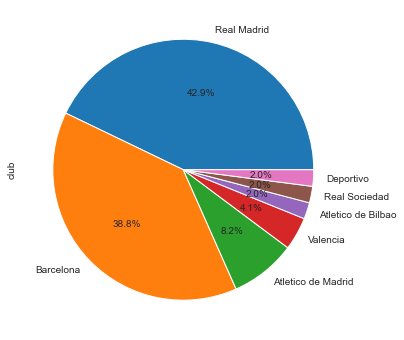

In [154]:
champs.club.value_counts().plot(kind = 'pie',autopct='%2.1f%%',figsize = (6,6))

In [155]:
champs['home_goals'] = champs.home_goals_x + champs.home_goals_y
champs['away_goals'] = champs.away_goals_x + champs.away_goals_y

champs.drop(columns = ['home_goals_x','away_goals_x','home_goals_y','away_goals_y'])
champs.tail(10)


AttributeError: 'DataFrame' object has no attribute 'home_goals_x'

<AxesSubplot:xlabel='club'>

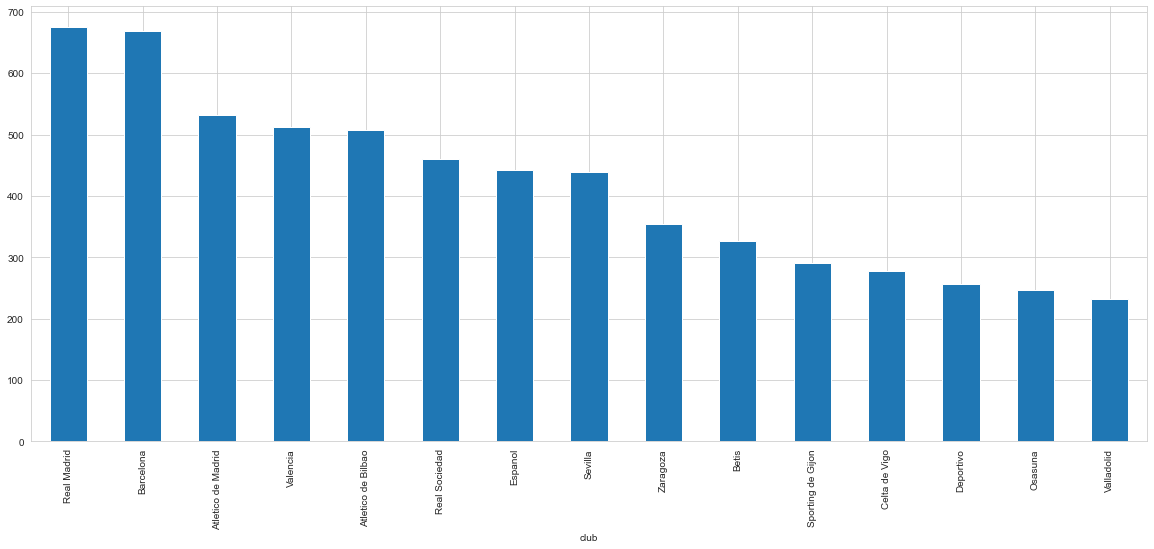

In [156]:
df1.groupby('club')['home_win'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar' , figsize = (20,8))

<AxesSubplot:xlabel='club'>

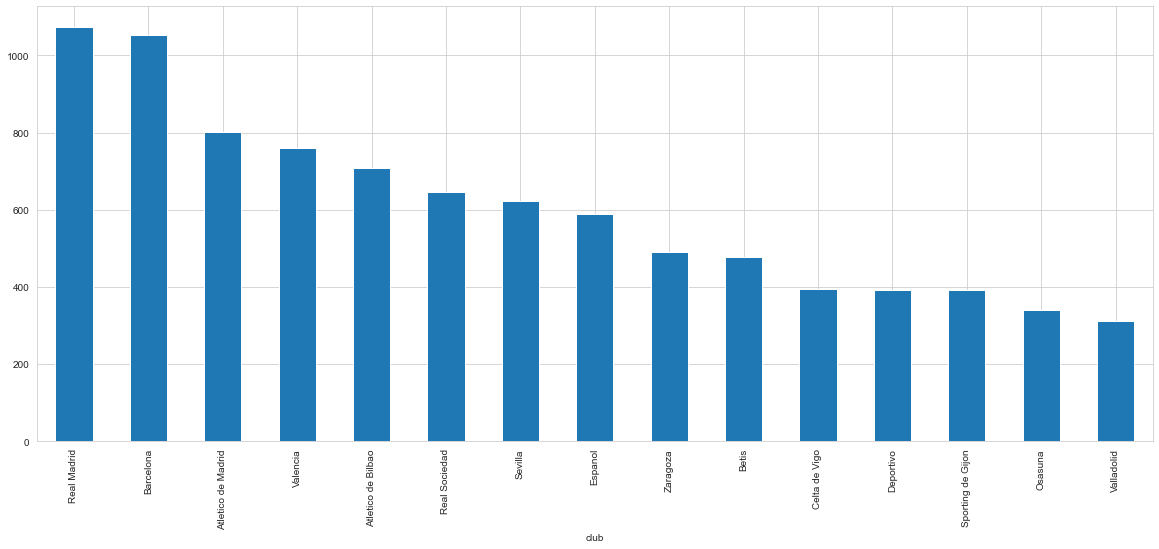

In [157]:
df1.groupby('club')['matches_won'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar' , figsize = (20,8))

In [158]:
df1.groupby('club')['goals_scored'].sum().sort_values(ascending = False).head(20)

club
Real Madrid           3673
Barcelona             3671
Atletico de Madrid    2620
Valencia              2547
Atletico de Bilbao    2386
Real Sociedad         2200
Sevilla               2068
Espanol               2019
Zaragoza              1836
Betis                 1670
Sporting de Gijon     1383
Celta de Vigo         1361
Deportivo             1319
Santander             1174
Osasuna               1133
Valladolid            1120
Mallorca               994
Villarreal             949
Las Palmas             866
Malaga                 779
Name: goals_scored, dtype: int64

In [159]:
w = df1.groupby(['club'])['home_goals'].sum().sort_values(ascending = False).head(20).reset_index()
x = df1.groupby(['club'])['away_goals'].sum().sort_values(ascending = False).head(20).reset_index()
y = df1.groupby(['club'])['goals_scored'].sum().sort_values(ascending = False).head(20).reset_index()
z = w.merge(x, on = ['club']).merge(y, on = ['club'])

a = df1.groupby(['club'])['home_win'].sum().sort_values(ascending = False).head(20).reset_index()
b = df1.groupby(['club'])['away_win'].sum().sort_values(ascending = False).head(20).reset_index()
c = df1.groupby(['club'])['matches_won'].sum().sort_values(ascending = False).head(20).reset_index()
d = a.merge(b, on = ['club']).merge(c, on = ['club']).merge(z, on = ['club'])

<AxesSubplot:xlabel='club'>

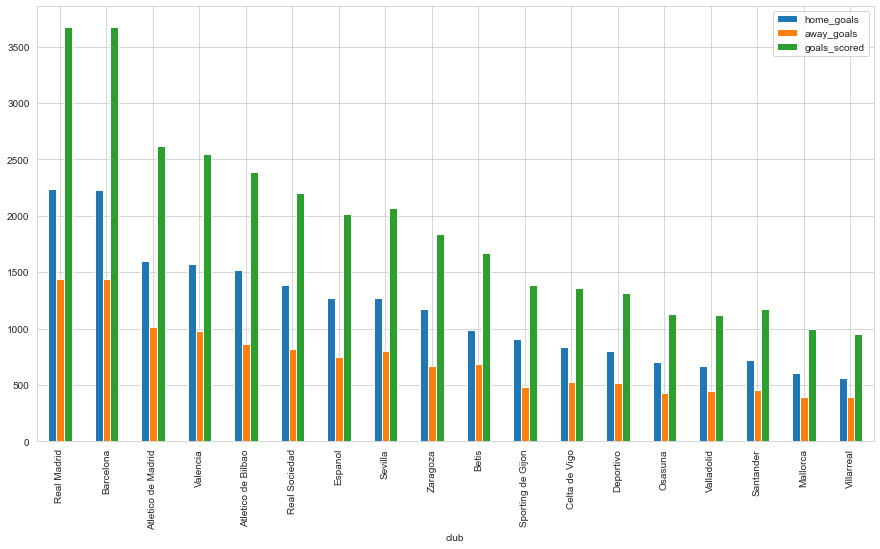

In [163]:
d.plot(x = 'club' , y = ['home_goals','away_goals','goals_scored'] , kind = "bar", figsize = (15,8))

#z.plot(x='club',y=['home_goals','away_goals','goals_scored'], kind="bar",figsize=(15,8))


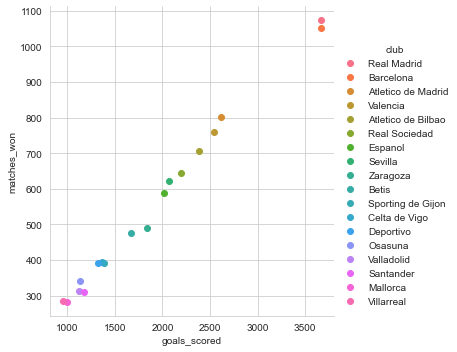

In [169]:
sns.FacetGrid(d, hue = 'club', height = 5).map(plt.scatter, 'goals_scored', 'matches_won').add_legend()

<AxesSubplot:ylabel='club'>

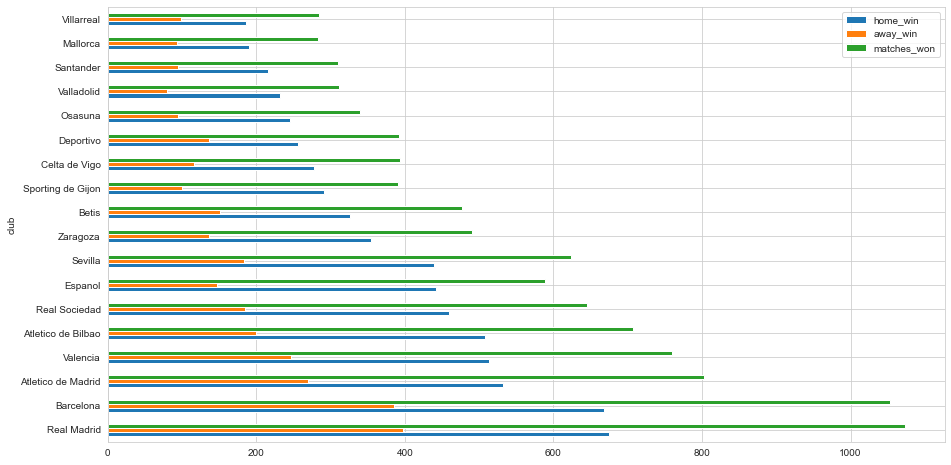

In [172]:
d.plot(x = 'club', y = ['home_win','away_win','matches_won'], kind = 'barh', figsize = (15,8))